In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame as dff
from pandas import Series
import warnings
warnings.filterwarnings('ignore')

In [2]:
fifa=pd.read_csv('fifa_stats.csv')

In [3]:
fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [4]:
##information about data
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

## Data Preprocessing

In [5]:
fifa.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [6]:
fifa.shape

(2000, 15)

In [7]:
#cleaning data
fifa.dropna(inplace=True)

In [8]:
fifa

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,R. BorrÃ©,22,Colombia,75,82,River Plate,Right,1,3,4,High/ Medium,RS,19,5.750000,157
1996,E. ZukanoviÄ‡,31,Bosnia Herzegovina,75,75,Genoa,Left,2,3,2,Low/ High,CB,87,6.250000,187
1997,A. Elis,22,Honduras,75,82,Houston Dynamo,Right,1,4,4,High/ Medium,RM,17,5.083333,170
1998,M. FernÃ¡ndez,32,Chile,75,75,Club Necaxa,Right,2,4,5,Medium/ Medium,LDM,14,5.083333,159


In [9]:
fifa.describe()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
count,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000
mean,27.215548,78.212014,80.328117,1.777890,3.202928,2.920242,15.253407,5.781886,169.483089
std,3.852519,3.293624,4.118002,0.812861,0.730443,0.964888,13.247428,0.442515,16.053960
min,17.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,5.083333,123.000000
25%,24.000000,76.000000,77.000000,1.000000,3.000000,2.000000,7.000000,5.500000,159.000000
50%,27.000000,77.000000,80.000000,2.000000,3.000000,3.000000,13.000000,6.000000,170.000000
75%,30.000000,80.000000,83.000000,2.000000,4.000000,4.000000,20.000000,6.166667,181.000000
max,40.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,6.583333,227.000000


In [10]:
#rounding off height column
fifa.Height=round(fifa.Height,2)

In [11]:
fifa

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.58,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.17,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.75,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.33,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.08,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,R. BorrÃ©,22,Colombia,75,82,River Plate,Right,1,3,4,High/ Medium,RS,19,5.75,157
1996,E. ZukanoviÄ‡,31,Bosnia Herzegovina,75,75,Genoa,Left,2,3,2,Low/ High,CB,87,6.25,187
1997,A. Elis,22,Honduras,75,82,Houston Dynamo,Right,1,4,4,High/ Medium,RM,17,5.08,170
1998,M. FernÃ¡ndez,32,Chile,75,75,Club Necaxa,Right,2,4,5,Medium/ Medium,LDM,14,5.08,159


In [12]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall_rating', 'Potential', 'Club',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Height',
       'Weight'],
      dtype='object')

In [13]:
nums=fifa.select_dtypes(include=np.number).columns
len(nums)

9

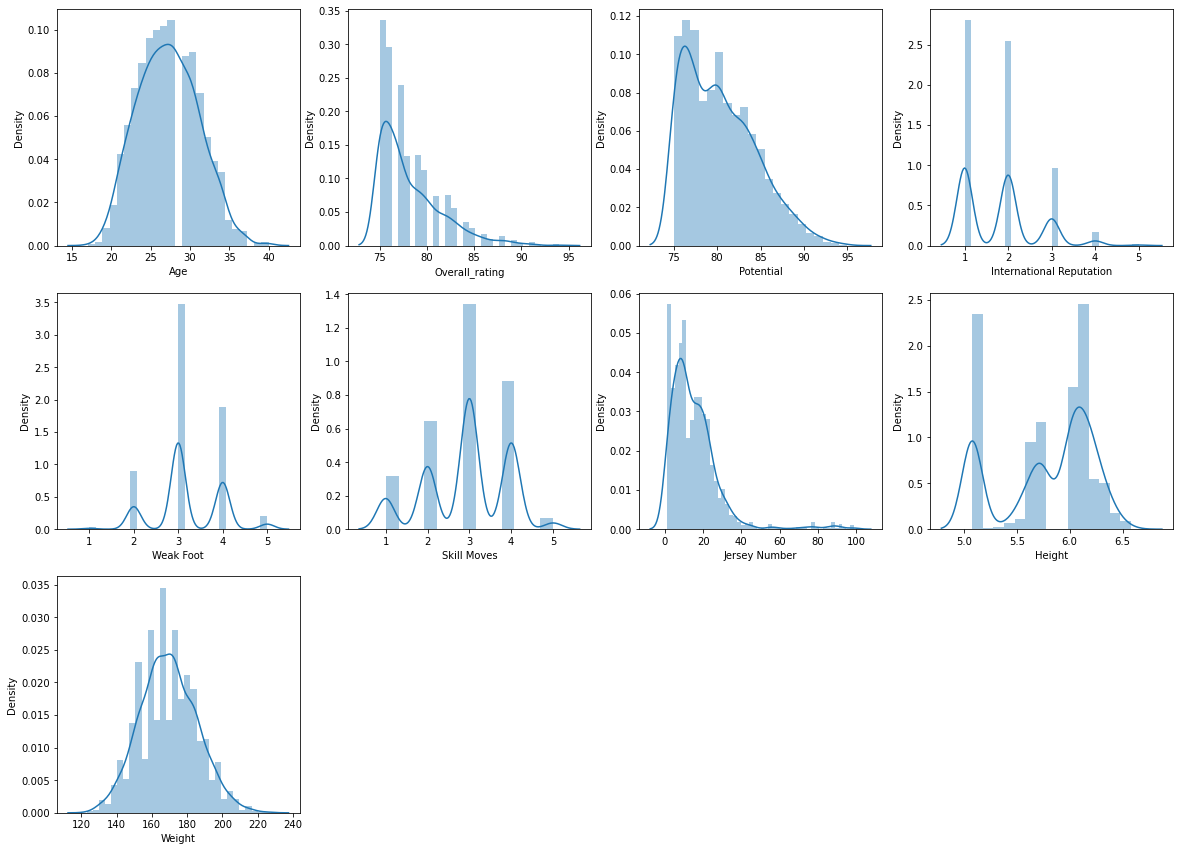

In [14]:
plt.figure(figsize=[20,20])
n_rows=4
n_cols=4
counter=1
for i in nums:
    plt.subplot(n_rows,n_cols,counter)
    sns.distplot(fifa.loc[:,i])
    counter+=1

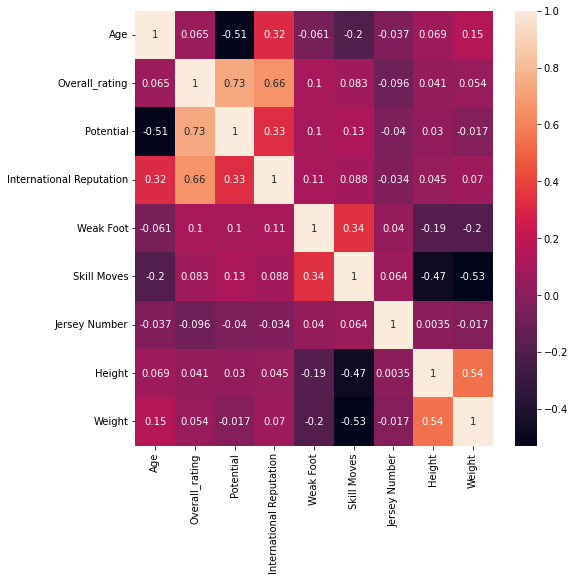

In [71]:
#heat map to show the correlation bw variables
plt.figure(figsize=[8,8])
sns.heatmap(fifa.corr(),annot=True)
plt.show()

In [16]:
import random
from random import sample

In [17]:
#creating a sample of 200 players 
df=fifa.sample(200)

In [18]:
sstd=df.Age.std()
pstd=fifa.Age.std()
smean=df.Age.mean()
pmean=fifa.Age.mean()
standard_error=pstd/np.sqrt(200)
print('standard deviation of sample is ', sstd)
print('standard deviation of population is ', pstd)
print('mean of sample is ',smean)
print('mean of population is ', pmean)
print('standard error is ',standard_error)

standard deviation of sample is  3.805721690814989
standard deviation of population is  3.8525185996930396
mean of sample is  27.17
mean of population is  27.215547703180214
standard error is  0.27241420264902505


In [19]:
##this is assumed that mean and standard deviation of population and sample is same or nearby

In [20]:
#2
#Ho: overall_rating=80
#Ha:overall_rating!=80

In [22]:
from scipy import stats

In [23]:
stats.ttest_1samp(fifa.Overall_rating,80) #i sample t-test

Ttest_1sampResult(statistic=-24.161970492711205, pvalue=3.000694684666212e-113)

In [24]:
#as the p value if less then the 0.05 so we reject the null hypothesis

In [25]:
#3
#Ho: prefered foot has no effect on potential
#Ha: prefered foot has impact on potential

In [26]:
#creating variables containing left foot and right foot potential
left_foot=fifa.loc[fifa['Preferred Foot']=='Left','Potential']
right_foot=fifa.loc[fifa['Preferred Foot']=='Right','Potential']

In [27]:
#t-test
stats.ttest_ind(left_foot,right_foot)

Ttest_indResult(statistic=1.6316202307100005, pvalue=0.1029186188520214)

In [28]:
# as Pvalue is grater then 0.05 so we failed to reject the null hypothesis

In [29]:
#Ho: overall rating is not dependent on potential
#Ha: overall rating is dependent on potential


In [30]:
#T-test
stats.ttest_ind(fifa.Overall_rating,fifa.Potential)

Ttest_indResult(statistic=-17.86119755089141, pvalue=1.0957726628240538e-68)

In [31]:
#as p value is less then 0.05 then we reject the null hypothesis

In [32]:
#Ho: skill_move has no effect on Overall Rating
#Ha: skill_move has effect on Overall_Rating


In [33]:
stats.ttest_ind(fifa['Skill Moves'],fifa['Overall_rating'])

Ttest_indResult(statistic=-976.418893273434, pvalue=0.0)

In [34]:
#as p value is 0 so we fail to reject reject hte null hypothesis

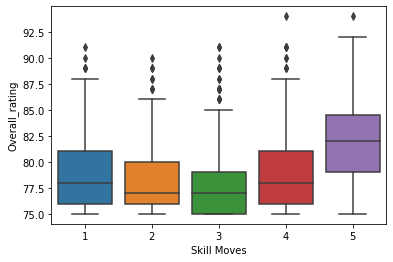

In [35]:
sns.boxplot(fifa['Skill Moves'],fifa['Overall_rating'])
#box plot to show the relation 
plt.show()

## Phone Dataset

In [36]:
phone=pd.read_csv('phone.csv')

In [37]:
phone.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [38]:
#checking null values
phone.isnull().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

In [39]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [40]:
phone.duration=round(phone.duration,2)

In [41]:
phone

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.32,data,2014-11,data,data
1,15-10-14 6:58,81.61,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.11,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.89,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.70,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...
815,10-03-15 6:58,185.33,data,2015-03,data,data
816,11-03-15 6:58,89.82,data,2015-03,data,data
817,12-03-15 6:58,117.60,data,2015-03,data,data
818,13-03-15 0:39,77.83,sms,2015-03,Vodafone,mobile


In [42]:
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

In [43]:
model=sfa.ols('duration~network',data=phone).fit()

In [44]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
network,6.0,1.752713e+04,2921.188282,1.403595,0.210316
Residual,813.0,1.692031e+06,2081.219507,NaN,NaN


In [45]:
ci_95=stats.norm.interval(0.95,144.3,1.59) #interval at 95 
ci_99=stats.norm.interval(0.99,144.3,1.59) #interval at 99 
phone.duration.mean() # mean of phone population 
phone.duration.std()/np.sqrt(len(phone)) # standard deviation of population
print('critical interval at 95 ',ci_95)
print('critical interval at 99 ',ci_99)

critical interval at 95  (141.1836572645813, 147.4163427354187)
critical interval at 99  (140.20443140735725, 148.39556859264277)


In [46]:
#2

<AxesSubplot:>

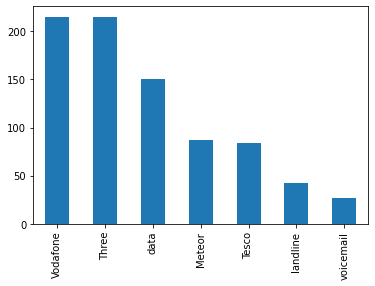

In [47]:
phone.network.value_counts().plot(kind='bar')

## 2.c.Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph.

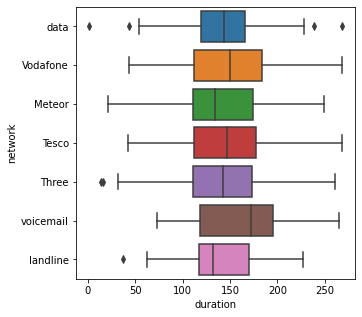

In [67]:
plt.figure(figsize=[5,5])
sns.boxplot(x=phone.duration,y=phone.network)
plt.show()

## 2d.	Perform statistical tests to identify the relation between item and duration Detailed explanation of relation between the classes is required

In [49]:
#Ho : item and duration are not related
#Ha: item ad duration are related

In [68]:
data=phone.loc[phone['item']=='data','duration']
call=phone.loc[phone['item']=='call','duration']
sms=phone.loc[phone['item']=='sms','duration']

In [50]:
stats.shapiro(phone.duration) #shapiro test to check the normality
#as p value is greater then 0.05 so we assume data is normal

ShapiroResult(statistic=0.9984685778617859, pvalue=0.7015525698661804)

In [69]:
#Ho: data call and sms are normally distributed
#Ha: data call and sms are not normally distributed
stats.shapiro(data),stats.shapiro(call),stats.shapiro(sms)

(ShapiroResult(statistic=0.9912657141685486, pvalue=0.485398530960083),
 ShapiroResult(statistic=0.9973031878471375, pvalue=0.7800790667533875),
 ShapiroResult(statistic=0.9943408370018005, pvalue=0.3784627914428711))

In [52]:
#as all p values of data call and sms is greater then 0.05 so data is assumed to be normal

In [53]:
phone.item.unique()

array(['data', 'call', 'sms'], dtype=object)

In [55]:
stats.levene(data,call,sms)

LeveneResult(statistic=3.429132769577386, pvalue=0.032882325942508214)

In [56]:
#as p value data,call,sms is less then 0.05 so we reject the null hypothesis

In [57]:

stats.kruskal(data,call,sms)

KruskalResult(statistic=3.5664911435628173, pvalue=0.16809170729130793)

In [58]:
#as p value is greater the 0.05 then we fail to reject Ho

#### e)	Perform statistical tests to identify the relation between network and network_type. 

In [59]:
#Ho: their is no relation between network and network_type
#Ha: their is relation between network and network_type

In [60]:
from scipy.stats import chi2_contingency

In [61]:
tbl=pd.crosstab(phone.network,phone.network_type)

In [62]:
tbl

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [63]:
stat,p,dof,expected=stats.chi2_contingency(tbl)

In [64]:
p

0.0

In [65]:
#as p is 0 so we reject the null hypothesis